In [1]:
!pip3 install -q -U tqdm --user
!pip3 install pyproj==1.9.6 --user
!apt-get install libgeos-3.5.0 --user
!apt-get install libgeos-dev --user
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip --user
!pip3 install metar --user

/bin/bash: apt-get: command not found
/bin/bash: apt-get: command not found
  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [1]:
import re
import multiprocessing
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import math
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
from metar import Metar

In [2]:
stations='AGGH	AGGL	AGGM	AYPY	BGBW	BGGH	BGJH	BGJN	BGKK	BGSF	BGTL	BIAR	BIEG	BIGR	BIHN	BIKF	BIRK	BIVM	CWAE	CWAF	CWAJ	CWAQ	CWAV	CWBA	CWBE	CWBK	CWBO	CWBT	CWBV	CWBY	CWBZ	CWCF	CWCI	CWCJ	CWCO	CWCT	CWDA	CWDC	CWDJ	CWDK	CWDM	CWDO	CWDQ	CWDT	CWDV	CWDZ	CWEB	CWEE	CWEF	CWEH	CWEK	CWEL	CWEP	CWEQ	CWER	CWEU	CWEW	CWEZ	CWFD	CWFF	CWFJ	CWFQ	CWGB	CWGD	CWGH	CWGL	CWGM	CWGR	CWGT	CWGW	CWGX	CWGY	CWGZ	CWHI	CWHL	CWHN	CWHO	CWHP	CWHQ	CWHT	CWHV	CWID	CWIG	CWII	CWIJ	CWIK	CWIL	CWIP	CWIS	CWIT	CWIW	CWIX	CWIZ	CWJB	CWJC	CWJD	CWJH	CWJI	CWJO	CWJR	CWJT	CWJU	CWJV	CWJW	CWJX	CWKD	CWKG	CWKH	CWKK	CWKO	CWKX	CWLB	CWLC	CWLE	CWLI	CWLM	CWLP	CWLS	CWLY	CWME	CWMJ	CWMM	CWMQ	CWMT	CWMZ	CWNC	CWND	CWNE	CWNH	CWNK	CWNL	CWNM	CWNP	CWNQ	CWNZ	CWOB	CWOC	CWOD	CWOE	CWOY	CWPC	CWPD	CWPE	CWPF	CWPK	CWPO	CWPR	CWPS	CWPX	CWPZ	CWQH	CWQK	CWQP	CWQR	CWQS	CWQV	CWRA	CWRJ	CWRK	CWRM	CWRN	CWRO	CWRT	CWRU	CWRX	CWRY	CWRZ	CWSA	CWSD	CWSF	CWSG	CWSK	CWSL	CWSP	CWSR	CWSS	CWST	CWSW	CWTA	CWTG	CWTN	CWTY	CWUS	CWUW	CWUX	CWVF	CWVI	CWVN	CWVP	CWVQ	CWVT	CWVU	CWWA	CWWB	CWWE	CWWF	CWWK	CWWL	CWWS	CWWU	CWWX	CWWZ	CWXA	CWXC	CWXI	CWXL	CWYJ	CWYL	CWYY	CWZA	CWZG	CWZL	CWZN	CWZO	CWZQ	CWZV	CWZW	CWZZ	CXBK	CXBO	CXCK	CXDE	CXDI	CXDW	CXEC	CXEG	CXGH	CXHF	CXKT	CXLC	CXLL	CXMD	CXMI	CXMM	CXMY	CXNM	CXOX	CXRH	CXSH	CXTN	CXTP	CXTV	CXWN	CYAH	CYAM	CYAS	CYAW	CYAY	CYAZ	CYBB	CYBC	CYBD	CYBG	CYBK	CYBL	CYBN	CYBR	CYBU	CYBV	CYBW	CYBX	CYCA	CYCB	CYCD	CYCG	CYCO	CYCP	CYCQ	CYCS	CYCX	CYCY	CYDA	CYDB	CYDC	CYDF	CYDN	CYDP	CYDQ	CYED	CYEG	CYEK	CYEN	CYET	CYEV	CYFB	CYFC	CYFO	CYFR	CYFS	CYFT	CYGE	CYGH	CYGK	CYGL	CYGP	CYGQ	CYGR	CYGT	CYGV	CYGW	CYGX	CYHA	CYHD	CYHE	CYHI	CYHK	CYHM	CYHU	CYHY	CYHZ	CYIK	CYIO	CYIV	CYJF	CYJT	CYKA	CYKD	CYKF	CYKG	CYKJ	CYKL	CYKO	CYKQ	CYKY	CYLA	CYLC	CYLD	CYLJ	CYLK	CYLL	CYLT	CYLU	CYLW	CYMA	CYMH	CYMJ	CYMM	CYMO	CYMT	CYMU	CYMX	CYNA	CYNC	CYND	CYNE	CYNM	CYOA	CYOC	CYOD	CYOJ	CYOW	CYOY	CYPA	CYPC	CYPD	CYPE	CYPG	CYPH	CYPL	CYPQ	CYPR	CYPW	CYPX	CYPY	CYQA	CYQB	CYQD	CYQF	CYQG	CYQH	CYQI	CYQK	CYQL	CYQM	CYQQ	CYQR	CYQT	CYQU	CYQV	CYQW	CYQX	CYQY	CYQZ	CYRB	CYRJ	CYRL	CYRT	CYRV	CYSB	CYSC	CYSD	CYSF	CYSJ	CYSK	CYSM	CYSN	CYSY	CYTE	CYTH	CYTL	CYTQ	CYTR	CYTS	CYTZ	CYUA	CYUB	CYUL	CYUS	CYUT	CYUX	CYUY	CYVC	CYVM	CYVO	CYVP	CYVQ	CYVR	CYVT	CYVV	CYWA	CYWG	CYWH	CYWJ	CYWK	CYWL	CYWY	CYXC	CYXE	CYXH	CYXJ	CYXL	CYXN	CYXP	CYXQ	CYXR	CYXS	CYXT	CYXU	CYXX	CYXY	CYXZ	CYYB	CYYC	CYYD	CYYE	CYYF	CYYG	CYYH	CYYJ	CYYL	CYYN	CYYQ	CYYR	CYYT	CYYU	CYYW	CYYY	CYYZ	CYZE	CYZF	CYZG	CYZH	CYZP	CYZR	CYZS	CYZT	CYZU	CYZV	CYZW	CYZX	CYZY	CZBF	CZCP	CZEM	CZFA	CZFM	CZFN	CZPC	CZST	CZUM	CZVL	DAAD	DAAE	DAAG	DAAJ	DAAP	DAAS	DAAT	DAAV	DAAY	DABB	DABC	DABS	DABT	DAFH	DAOB	DAOF	DAOI	DAOL	DAON	DAOO	DAOR	DAOV	DATM	DAUA	DAUB	DAUE	DAUG	DAUH	DAUI	DAUK	DAUL	DAUO	DAUT	DAUU	DAUZ	DBBB	DFFD	DFOO	DGAA	DGLE	DGSI	DGTK	DIAD	DIAP	DIBK	DIKO	DISP	DIYO	DNCA	DNEN	DNIB	DNIL	DNJO	DNKA	DNKN	DNMA	DNMK	DNMM	DNPO	DNSO	DNYO	DRRB	DRRM	DRRN	DRRT	DRZA	DRZR	DTKA	DTMB	DTTA	DTTB	DTTD	DTTF	DTTG	DTTJ	DTTK	DTTL	DTTN	DTTR	DTTX	DTTZ	DXNG	DXSK	DXXX	EBAW	EBBE	EBBL	EBBR	EBCI	EBCV	EBDT	EBFN	EBFS	EBLB	EBLG	EBOS	EDAC	EDAH	EDDB	EDDC	EDDE	EDDF	EDDG	EDDH	EDDK	EDDL	EDDM	EDDN	EDDP	EDDR	EDDS	EDDT	EDDV	EDDW	EDFH	EDFM	EDGS	EDHI	EDHK	EDHL	EDLN	EDLP	EDLV	EDLW	EDMA	EDMO	EDNY	EDQM	EDSB	EDTL	EDVE	EDVK	EDXW	EEKA	EEKE	EEPU	EETN	EETU	EFET	EFHA	EFHK	EFIV	EFJO	EFJY	EFKE	EFKI	EFKK	EFKS	EFKT	EFKU	EFLP	EFMA	EFMI	EFOU	EFPO	EFRO	EFSA	EFSI	EFTP	EFTU	EFUT	EFVA	EGAA	EGAC	EGAE	EGBB	EGBJ	EGCC	EGDM	EGDR	EGDY	EGEC	EGFF	EGGD	EGGP	EGGW	EGHE	EGHH	EGHI	EGJA	EGJB	EGJJ	EGKA	EGKB	EGKK	EGLC	EGLF	EGLL	EGMC	EGMD	EGNC	EGNH	EGNJ	EGNM	EGNR	EGNS	EGNT	EGNV	EGNX	EGOM	EGOP	EGOS	EGOV	EGOW	EGPA	EGPB	EGPC	EGPD	EGPE	EGPF	EGPH	EGPI	EGPK	EGPL	EGPM	EGPN	EGPO	EGPU	EGQA	EGQK	EGQL	EGQM	EGQS	EGSC	EGSH	EGSS	EGSY	EGTC	EGTE	EGUB	EGUL	EGUN	EGUW	EGVA	EGVN	EGVO	EGVP	EGWC	EGWU	EGXC	EGXE	EGXP	EGXT	EGXU	EGXV	EGXW	EGXZ	EGYD	EGYE	EGYH	EGYM	EGYP	EHAM	EHBK	EHDL	EHEH	EHGG	EHGR	EHKD	EHLE	EHLW	EHRD	EHVK	EHVL	EHWO	EICK	EIDW	EIKN	EIME	EINN	EKAH	EKBI	EKCH	EKEB	EKKA	EKOD	EKRK	EKRN	EKSB	EKSN	EKSP	EKVD	EKVG	EKVJ	EKYT	ELLX	ENAL	ENAN	ENAT	ENBL	ENBN	ENBO	ENBR	ENBS	ENBV	ENCN	ENDR	ENDU	ENEV	ENFB	ENFL	ENGC	ENGM	ENHD	ENHE	ENHF	ENHK	ENHV	ENKB	ENKR	ENLK	ENMH	ENML	ENMS	ENNA	ENNM	ENNO	ENOA	ENOL	ENOV	ENRA	ENRM	ENRO	ENRS	ENRY	ENSB	ENSD	ENSG	ENSH	ENSK	ENSO	ENSR	ENSS	ENST	ENTC	ENTO	ENVA	ENVD	ENZV	EPGD	EPKK	EPKT	EPPO	EPRZ	EPSC	EPWA	EPWR	EPZG	EQYG	ESCF	ESCM	ESDF	ESGG	ESGJ	ESGR	ESGT	ESIB	ESKM	ESKN	ESMK	ESMQ	ESMS	ESMT	ESMX	ESNG	ESNK	ESNL	ESNN	ESNO	ESNQ	ESNS	ESNU	ESOE	ESOK	ESOW	ESPA	ESPE	ESSA	ESSB	ESSD	ESSF	ESSL	ESSP	ESSV	ESTL	ETAD	ETAR	ETEB	ETGG	ETHA	ETHB	ETHC	ETHF	ETHL	ETHN	ETHS	ETIC	ETIH	ETIK	ETMN	ETND	ETNG	ETNH	ETNL	ETNN	ETNS	ETNT	ETNW	ETOU	ETSB	ETSH	ETSI	ETSL	ETSN	ETWM	EVLA	EVRA	EYKA	EYPA	EYSA	EYVI	FABL	FABM	FACT	FACV	FADY	FAEL	FAEO	FAGG	FAGM	FAHS	FAIR	FAKM	FALA	FALW	FAMM	FANC	FAOB	FAPE	FASB	FASI	FAUP	FAUT	FAVV	FAWB	FAWK	FBFT	FBKE	FBMN	FBSK	FBSP	FCBB	FCOI	FCPP	FDMS	FEFF	FEFO	FEFT	FGSL	FHAW	FIMP	FIMR	FJDG	FKKD	FKKN	FKKR	FKYS	FLMF	FLND	FMCH	FMCV	FMCZ	FMEE	FMEP	FMMI	FMMS	FMMT	FMNA	FMNM	FMNN	FMSD	FNBG	FNCA	FNHU	FNKU	FNLU	FOGM	FOGR	FOOB	FOOG	FOOK	FOOL	FOON	FOOR	FOOT	FPST	FQBR	FQCH	FQIN	FQLC	FQMA	FQNP	FQPB	FQQL	FQTE	FQTT	FQVL	FSIA	FTTA	FTTC	FTTD	FTTJ	FTTY	FVCZ	FVFA	FVKB	FVMV	FVWN	FWCL	FWKI	FXMM	FYGF	FYKM	FYKT	FYLZ	FYOA	FYRU	FYWB	FYWH	FYWW	FZAA	FZNA	FZQA	FZRF	FZWA	GABG	GABS	GAKO	GAKT	GAMB	GANK	GANR	GASK	GASN	GATB	GBYD	GCFV	GCHI	GCLA	GCLP	GCRR	GCTS	GCXO	GEML	GFLL	GGOV	GLRB	GMAA	GMAD	GMAT	GMFF	GMFK	GMFM	GMFO	GMMC	GMME	GMMI	GMML	GMMN	GMMW	GMMX	GMMZ	GMTA	GMTN	GMTT	GOGG	GOGK	GOGS	GOOD	GOOG	GOOK	GOOY	GOSM	GOSP	GOSS	GOTK	GOTT	GQNI	GQPA	GQPP	GUCY	GULB	GUNZ	GVAC	HAAB	HABD	HADR	HAJJ	HAMK	HBBA	HCMH	HCMM	HDAM	HEAR	HEAT	HEAX	HEBA	HECA	HEGN	HELX	HEMM	HEPS	HESH	HESN	HETB	HETR	HKEL	HKJK	HKKI	HKML	HKMO	HKNW	HKWJ	HRYR	HSDN	HSOB	HSPN	HSSJ	HSSS	HTAR	HTBU	HTDA	HTDO	HTIR	HTKA	HTKI	HTKJ	HTMG	HTMS	HTMT	HTMU	HTMW	HTPE	HTSE	HTSO	HTSY	HTTB	HTTG	HTZA	HUEN	HUJI	HUKB	HUKS	HUMA	HUMI	HUSO	HUTO	K0J4	K0VG	K04V	K06D	K08D	K1A5	K1A6	K1F0	K1H2	K1J0	K1M4	K1P1	K1V4	K2C8	K2D5	K2DP	K2WX	K3I2	K3J7	K3LF	K3T5	K4A9	K4BM	K4MR	K4O4	K5H4	K5SM	K6R6	K7BM	K7L2	K8A0	K8D3	K9D7	K9L2	K9V9	K11R	K12N	K14Y	K20U	K20V	K21D	K40B	K40J	K46D	K79J	K96D	KAAA	KAAF	KAAO	KAAT	KABI	KABR	KABY	KACB	KACK	KACP	KACQ	KACT	KACV	KACY	KADC	KADG	KADH	KADM	KADS	KADU	KADW	KAEG	KAEJ	KAEL	KAEX	KAFF	KAFJ	KAFK	KAFN	KAFP	KAFW	KAGC	KAGR	KAGS	KAHN	KAIA	KAID	KAIG	KAIO	KAIT	KAIZ	KAJG	KAKH	KAKO	KAKQ	KAKR	KALB	KALI	KALM	KALN	KALO	KALS	KALW	KALX	KAMG	KAMN	KAMW	KANB	KAND	KANE	KANJ	KANW	KAOH	KAOO	KAPA	KAPC	KAPF	KAPG	KAPN	KAQO	KAQP	KAQR	KAQV	KAQW	KARA	KARB	KARG	KARM	KARR	KARV	KASD	KASE	KASG	KASH	KASJ	KAST	KASW	KASX	KATL	KATP	KATS	KATT	KATW	KATY	KAUG	KAUH	KAUM	KAUN	KAUO	KAUW	KAVC	KAVK	KAVL	KAVP	KAVX	KAWG	KAWM	KAWO	KAXA	KAXN	KAXS	KAYS	KAZC	KAZO	KBAB	KBAC	KBAD	KBAF	KBAK	KBAX	KBAZ	KBBB	KBBD	KBBF	KBBW	KBCB	KBCE	KBCT	KBDE	KBDL	KBDR	KBED	KBEH	KBFD	KBFF	KBFI	KBFL	KBFM	KBFW	KBGD	KBGE	KBGM	KBGR	KBHB	KBHK	KBHM	KBID	KBIE	KBIF	KBIH	KBIL	KBIS	KBIV	KBIX	KBJC	KBJI	KBJJ	KBKB	KBKE	KBKF	KBKL	KBKS	KBKT	KBKV	KBKW	KBKX	KBLF	KBLH	KBLM	KBLU	KBLV	KBMG	KBMI	KBML	KBMQ	KBNO	KBNW	KBOI	KBOK	KBOS	KBOW	KBPG	KBPI	KBPK	KBPT	KBQK	KBQX	KBRD	KBRL	KBRO	KBTL	KBTM	KBTP	KBTR	KBTV	KBUR	KBUU	KBUY	KBVI	KBVN	KBVO	KBVS	KBVX	KBVY	KBWD	KBWG	KBWI	KBWP	KBXA	KBYG	KBYH	KBYI	KBYS	KBYY	KBZN	KC09	KC75	KCAD	KCAE	KCAG	KCAK	KCAO	KCAR	KCAV	KCBE	KCBF	KCBG	KCBM	KCCO	KCCR	KCCU	KCCY	KCDC	KCDD	KCDH	KCDJ	KCDR	KCDS	KCDW	KCEC	KCEF	KCEU	KCEW	KCEZ	KCFE	KCFS	KCFV	KCGF	KCGI	KCGZ	KCHA	KCHD	KCHK	KCHO	KCHS	KCIC	KCID	KCIN	KCIR	KCIU	KCJR	KCKB	KCKC	KCKN	KCKP	KCKV	KCLE	KCLI	KCLK	KCLL	KCLM	KCLT	KCMA	KCMI	KCMX	KCMY	KCNB	KCNC	KCNK	KCNM	KCNO	KCNU	KCNY	KCOD	KCOE	KCOF	KCON	KCOQ	KCOS	KCOT	KCOU	KCPC	KCPK	KCPS	KCPT	KCPW	KCQB	KCQC	KCQM	KCQT	KCQX	KCRE	KCRG	KCRP	KCRQ	KCRS	KCRW	KCSG	KCSM	KCSQ	KCSV	KCTB	KCTY	KCTZ	KCUB	KCUH	KCUL	KCUT	KCVG	KCVN	KCVO	KCVS	KCVX	KCWA	KCWF	KCWI	KCXO	KCXP	KCXY	KCYS	KCZZ	KD07	KD50	KD55	KD60	KDAA	KDAB	KDAG	KDAL	KDAN	KDAW	KDAY	KDBN	KDBQ	KDCA	KDCU	KDDC	KDDH	KDEC	KDEH	KDEN	KDEQ	KDET	KDEW	KDFI	KDGW	KDHN	KDHT	KDIK	KDKB	KDKK	KDKR	KDKX	KDLF	KDLH	KDLL	KDLN	KDLP	KDLS	KDMA	KDMH	KDMN	KDMO	KDNL	KDNN	KDNS	KDNV	KDOV	KDPA	KDPG	KDPL	KDQH	KDRA	KDRI	KDRO	KDSM	KDSV	KDTL	KDTN	KDTO	KDTS	KDTW	KDUA	KDUC	KDUH	KDUJ	KDUX	KDVL	KDVN	KDVP	KDVT	KDWH	KDXR	KDXX	KDYL	KDYR	KDYS	KDYT	KE38	KEAR	KEAT	KEAU	KEBG	KEBS	KECG	KECP	KECU	KEDE	KEDW	KEED	KEEN	KEEO	KEET	KEFD	KEFT	KEGE	KEGI	KEGV	KEHA	KEHO	KEHR	KEHY	KEIR	KEKA	KEKM	KEKN	KEKO	KEKQ	KELD	KELM	KELN	KELO	KELP	KELY	KELZ	KEMK	KEMP	KEMT	KEMV	KEND	KENL	KENV	KENW	KEOK	KEPH	KEQY	KERI	KERV	KERY	KESC	KESF	KESN	KEST	KETB	KETH	KEUG	KEUL	KEVB	KEVM	KEVV	KEVW	KEWB	KEWK	KEWN	KEXX	KEYE	KEYF	KEYW	KEZF	KEZM	KF05	KFAF	KFAM	KFAR	KFAT	KFAY	KFBG	KFBL	KFCH	KFCM	KFCS	KFDK	KFDR	KFDY	KFEP	KFET	KFFA	KFFC	KFFL	KFFM	KFFO	KFFT	KFFZ	KFGN	KFHR	KFHU	KFIG	KFIT	KFKA	KFKL	KFKN	KFKS	KFLD	KFLG	KFLL	KFLO	KFLP	KFME	KFMH	KFMN	KFMY	KFNB	KFNL	KFOA	KFOD	KFOE	KFOK	KFOZ	KFPK	KFPR	KFQD	KFRG	KFRI	KFRM	KFSD	KFSE	KFSI	KFSM	KFST	KFSW	KFTG	KFTK	KFTW	KFTY	KFUL	KFVE	KFVX	KFWA	KFWC	KFWN	KFWS	KFXE	KFYJ	KFYV	KFZY	KGAD	KGAF	KGAG	KGAO	KGBD	KGBG	KGBK	KGCC	KGCK	KGCM	KGCN	KGDB	KGDJ	KGDP	KGDV	KGED	KGEG	KGEU	KGEV	KGEY	KGEZ	KGFA	KGFK	KGFL	KGGG	KGGW	KGHB	KGHW	KGIF	KGJT	KGKJ	KGKY	KGLD	KGLE	KGLH	KGLR	KGLS	KGLW	KGMJ	KGMU	KGNA	KGNC	KGNR	KGNT	KGNV	KGOK	KGON	KGOP	KGOV	KGPM	KGPT	KGPZ	KGRD	KGRF	KGRI	KGRK	KGRN	KGRR	KGRY	KGSB	KGSH	KGSP	KGTB	KGTF	KGTR	KGTU	KGUC	KGUL	KGUP	KGUS	KGUY	KGVL	KGVT	KGWO	KGWR	KGWW	KGXY	KGYB	KGYI	KGYL	KGYR	KGYY	KGZH	KHAO	KHBG	KHBI	KHBR	KHBV	KHCD	KHCO	KHDC	KHDE	KHDN	KHDO	KHEF	KHEI	KHEY	KHEZ	KHFD	KHFF	KHGR	KHHF	KHHR	KHHV	KHIB	KHIE	KHIF	KHIO	KHJH	KHJO	KHKA	KHKS	KHKY	KHLC	KHLG	KHLN	KHLR	KHLX	KHMN	KHMZ	KHNB	KHND	KHNR	KHNZ	KHOB	KHON	KHOP	KHOT	KHOU	KHPN	KHQI	KHQM	KHQU	KHQZ	KHRI	KHRJ	KHRL	KHRO	KHRT	KHSA	KHSB	KHSE	KHSI	KHSP	KHST	KHTH	KHTL	KHTO	KHTS	KHUF	KHUL	KHUM	KHUT	KHVN	KHVR	KHWD	KHWO	KHWV	KHXD	KHYA	KHYI	KHYR	KHYS	KHYX	KHZE	KHZX	KHZY	KI16	KI63	KIAB	KIAD	KIAH	KIBM	KICL	KICR	KICT	KIDA	KIDI	KIEN	KIER	KIFP	KIGM	KIGQ	KIIB	KIIY	KIJD	KIJX	KIKK	KIKT	KIKV	KILE	KILG	KILM	KILN	KIML	KIMT	KINJ	KINK	KINL	KINS	KINT	KINW	KIOW	KIPJ	KIPL	KIPT	KIRK	KIRS	KISM	KISO	KISP	KISQ	KISW	KITH	KITR	KIWA	KIWD	KIWI	KIXD	KIZA	KIZG	KJAC	KJAN	KJAS	KJAX	KJBR	KJCT	KJDD	KJDN	KJEF	KJER	KJES	KJFK	KJGG	KJHW	KJKJ	KJKL	KJLN	KJMR	KJMS	KJNX	KJOT	KJQF	KJSO	KJST	KJSV	KJVL	KJWG	KJWY	KJXI	KJXN	KJYG	KJYL	KJYM	KJYO	KJYR	KKLS	KLAA	KLAF	KLAL	KLAM	KLAN	KLAR	KLAS	KLAW	KLAX	KLBB	KLBE	KLBF	KLBL	KLBX	KLCG	KLCH	KLCI	KLCK	KLDM	KLEB	KLEE	KLEW	KLEX	KLFI	KLFK	KLFT	KLGA	KLGB	KLGC	KLGD	KLGU	KLHB	KLHQ	KLHW	KLHX	KLHZ	KLIC	KLIT	KLJF	KLKU	KLKV	KLLJ	KLLQ	KLNC	KLND	KLNK	KLNL	KLNN	KLNP	KLNR	KLNS	KLOL	KLOM	KLOR	KLOT	KLOU	KLOZ	KLPC	KLPR	KLRD	KLRF	KLRJ	KLRU	KLSE	KLSF	KLSV	KLTS	KLUD	KLUF	KLUK	KLUM	KLVJ	KLVK	KLVM	KLVN	KLVS	KLWA	KLWB	KLWC	KLWD	KLWM	KLWS	KLWT	KLWV	KLXL	KLXN	KLXT	KLXV	KLYH	KLYV	KLZU	KLZZ	KM19	KM30	KMAE	KMAF	KMAI	KMAN	KMBG	KMBL	KMBS	KMCB	KMCC	KMCD	KMCE	KMCF	KMCK	KMCN	KMCO	KMCW	KMDD	KMDH	KMDJ	KMDQ	KMDW	KMDZ	KMEB	KMEH	KMEI	KMEM	KMER	KMEZ	KMFD	KMFI	KMFV	KMGE	KMGG	KMGJ	KMGM	KMGN	KMGR	KMGW	KMGY	KMHE	KMHK	KMHR	KMHS	KMHT	KMHV	KMIA	KMIB	KMIC	KMIE	KMIS	KMIV	KMIW	KMJQ	KMKC	KMKG	KMKJ	KMKL	KMKN	KMKO	KMKT	KMLB	KMLC	KMLE	KMLF	KMLI	KMLJ	KMLP	KMLS	KMLT	KMLU	KMMH	KMMK	KMML	KMMT	KMMU	KMMV	KMNH	KMNI	KMNM	KMNN	KMOB	KMOD	KMOP	KMOT	KMOX	KMPO	KMPV	KMPZ	KMQB	KMQE	KMQI	KMQY	KMRB	KMRC	KMRF	KMRH	KMRJ	KMRN	KMRY	KMSL	KMSN	KMSO	KMSP	KMSS	KMSV	KMTC	KMTH	KMTJ	KMTN	KMTO	KMTP	KMTV	KMTW	KMUI	KMUO	KMUT	KMVE	KMVL	KMVN	KMVY	KMWA	KMWC	KMWH	KMWK	KMWL	KMWM	KMWN	KMWT	KMXF	KMXO	KMYF	KMYL	KMYP	KMYR	KMYV	KMZG	KMZH	KN60	KNAK	KNBC	KNBG	KNBT	KNCA	KNDZ	KNEL	KNEW	KNFE	KNFG	KNFL	KNFW	KNGP	KNGU	KNHK	KNID	KNIP	KNJK	KNJM	KNJW	KNKT	KNKX	KNLC	KNMM	KNOG	KNOW	KNPA	KNQA	KNQI	KNQX	KNRB	KNRS	KNSE	KNSI	KNTD	KNTU	KNUC	KNUI	KNUQ	KNUW	KNXP	KNYC	KNYG	KNYL	KNZY	KO54	KOAJ	KOBE	KOCF	KOCH	KOCW	KODO	KODX	KOEB	KOEO	KOFF	KOFK	KOFP	KOGA	KOGB	KOGD	KOGS	KOJA	KOJC	KOKB	KOKC	KOKK	KOKM	KOKV	KOLE	KOLF	KOLM	KOLS	KOLU	KOLV	KOLY	KOLZ	KOMA	KOMH	KOMK	KOMN	KONA	KONL	KONM	KONO	KONP	KONX	KONZ	KOOA	KOPF	KOPN	KOQT	KOQU	KORB	KORD	KORE	KORF	KORG	KORH	KORL	KORS	KOSA	KOSC	KOSH	KOSU	KOTG	KOTH	KOTM	KOUN	KOVE	KOVL	KOVS	KOWA	KOWB	KOWD	KOXB	KOXC	KOXR	KOXV	KOZR	KOZW	KP28	KP53	KP58	KP59	KP60	KP68	KP69	KP92	KPAE	KPAH	KPAM	KPAO	KPBF	KPBH	KPBI	KPCM	KPCZ	KPDC	KPDK	KPDT	KPEA	KPEO	KPEQ	KPEX	KPGA	KPGD	KPGV	KPHD	KPHN	KPHP	KPHX	KPIA	KPIB	KPIE	KPIH	KPIL	KPIR	KPIT	KPKB	KPKD	KPKV	KPLN	KPMD	KPMP	KPMV	KPNA	KPNC	KPNE	KPNM	KPNS	KPNT	KPOB	KPOC	KPOE	KPOF	KPOU	KPPA	KPPF	KPPQ	KPQI	KPQN	KPRB	KPRC	KPRG	KPRN	KPRX	KPSC	KPSF	KPSK	KPSM	KPSN	KPSP	KPSX	KPTB	KPTK	KPTN	KPTT	KPTV	KPTW	KPUB	KPUC	KPUW	KPVC	KPVD	KPVJ	KPVU	KPVW	KPWA	KPWC	KPWG	KPWK	KPWT	KPYM	KPYX	KPZQ	KQCJ	KQTA	KRAC	KRAL	KRAP	KRAS	KRBD	KRBG	KRBL	KRBO	KRCA	KRCX	KRDD	KRDG	KRDK	KRDM	KRDR	KREO	KRFD	KRGK	KRHI	KRHP	KRHV	KRIL	KRIV	KRIW	KRKD	KRKP	KRKR	KRKS	KRME	KRMG	KRMN	KRMY	KRND	KRNH	KRNM	KRNP	KRNT	KROA	KROC	KROG	KROS	KROW	KROX	KRPD	KRPH	KRPJ	KRQB	KRQE	KRQO	KRRL	KRRT	KRSL	KRSN	KRST	KRSV	KRTN	KRUE	KRUG	KRUQ	KRUT	KRVL	KRVS	KRWF	KRWI	KRWL	KRWV	KRXE	KRYV	KRYY	KRZN	KS21	KS25	KS32	KSAC	KSAD	KSAF	KSAN	KSAR	KSAV	KSAW	KSAZ	KSBA	KSBD	KSBM	KSBN	KSBP	KSBS	KSBY	KSCF	KSCH	KSCK	KSDA	KSDB	KSDF	KSDL	KSDM	KSDY	KSEE	KSEG	KSEM	KSEP	KSET	KSEZ	KSFB	KSFF	KSFM	KSFQ	KSFY	KSFZ	KSGF	KSGH	KSGJ	KSGR	KSGS	KSGT	KSGU	KSHD	KSHL	KSHN	KSHP	KSHR	KSHV	KSIY	KSJN	KSJT	KSJX	KSKA	KSKF	KSKX	KSLB	KSLE	KSLG	KSLH	KSLI	KSLK	KSLN	KSLO	KSLR	KSME	KSMN	KSMO	KSMP	KSMQ	KSMX	KSNA	KSNC	KSNK	KSNL	KSNS	KSNT	KSNY	KSOA	KSOP	KSOW	KSPA	KSPB	KSPD	KSPF	KSPG	KSPI	KSPR	KSPS	KSPW	KSQI	KSQL	KSRC	KSRE	KSRQ	KSRR	KSSC	KSSF	KSSI	KSTC	KSTE	KSTJ	KSTP	KSTS	KSUA	KSUE	KSUN	KSUS	KSUT	KSUU	KSUW	KSUX	KSVC	KSVE	KSVH	KSVN	KSWF	KSWO	KSWW	KSXT	KSYN	KSZL	KSZT	KT82	KTAD	KTAN	KTAZ	KTBN	KTBR	KTCC	KTCL	KTCM	KTCS	KTDF	KTDZ	KTEB	KTEW	KTEX	KTHV	KTIF	KTIK	KTIP	KTIW	KTIX	KTKA	KTKC	KTKI	KTKV	KTLH	KTMB	KTNB	KTNU	KTOA	KTOB	KTOI	KTOL	KTOP	KTOR	KTPA	KTPF	KTPH	KTPL	KTQE	KTQH	KTRI	KTRK	KTRL	KTRM	KTTA	KTTD	KTTF	KTTN	KTTS	KTUL	KTUP	KTUS	KTVC	KTVF	KTVI	KTVL	KTVR	KTWF	KTWM	KTXK	KTYR	KTYS	KTZR	KU16	KU42	KUAO	KUCP	KUDG	KUES	KUGN	KUIL	KUIN	KUKF	KUKI	KUKL	KUKT	KULM	KUNO	KUNU	KUNV	KUOX	KUTA	KUTS	KUUU	KUVA	KUZA	KVAD	KVAF	KVAY	KVBG	KVBT	KVCB	KVCT	KVCV	KVDF	KVDI	KVEL	KVGT	KVIH	KVIS	KVJI	KVKS	KVLD	KVLL	KVNY	KVOK	KVPC	KVPS	KVPZ	KVQQ	KVRB	KVSF	KVTA	KVTI	KVTN	KVTP	KVUJ	KVUO	KVVV	KVWU	KVYS	KW22	KW63	KW99	KWAL	KWDG	KWDR	KWHP	KWJF	KWLD	KWMC	KWRB	KWRI	KWRL	KWST	KWVI	KWVL	KWWD	KWWR	KWYS	KXBP	KXMR	KXNA	KXVG	KY19	KY50	KY51	KY63	KYIP	KYKM	KYKN	KYNG	KZZV	LATI	LBBG	LBGO	LBPD	LBSF	LBWN	LCEN	LCLK	LCPH	LCRA	LDDU	LDLO	LDOS	LDPL	LDRI	LDSB	LDSP	LDZA	LDZD	LEAB	LEAL	LEAM	LEAS	LEBA	LEBB	LEBG	LEBL	LEBZ	LECH	LECO	LECV	LEGA	LEGE	LEGR	LEGT	LEIB	LEJR	LELC	LELL	LELN	LELO	LEMD	LEMG	LEMH	LEMO	LEPA	LEPP	LERI	LERS	LERT	LESA	LESO	LEST	LETO	LEVC	LEVD	LEVS	LEVT	LEVX	LEXJ	LEZG	LEZL	LFAT	LFBA	LFBC	LFBD	LFBE	LFBG	LFBH	LFBI	LFBL	LFBM	LFBO	LFBP	LFBT	LFBY	LFBZ	LFCR	LFGJ	LFHP	LFJL	LFKB	LFKC	LFKF	LFKJ	LFKS	LFLB	LFLC	LFLL	LFLN	LFLS	LFLW	LFLX	LFLY	LFMC	LFMD	LFMH	LFMI	LFMK	LFML	LFMN	LFMO	LFMP	LFMT	LFMU	LFMY	LFOA	LFOB	LFOC	LFOE	LFOH	LFOJ	LFOK	LFOP	LFOT	LFPB	LFPG	LFPM	LFPN	LFPO	LFPV	LFQB	LFQG	LFQQ	LFRB	LFRC	LFRD	LFRH	LFRI	LFRJ	LFRK	LFRL	LFRM	LFRN	LFRO	LFRQ	LFRS	LFRT	LFRU	LFRZ	LFSB	LFSD	LFSI	LFSL	LFSN	LFSO	LFST	LFSX	LFTH	LFTW	LFVP	LFYR	LGAD	LGAL	LGAV	LGBL	LGEL	LGHI	LGIR	LGKC	LGKF	LGKL	LGKO	LGKP	LGKR	LGKV	LGKZ	LGLM	LGLR	LGMK	LGMT	LGNX	LGPA	LGPZ	LGRP	LGRX	LGSA	LGSK	LGSM	LGSO	LGSR	LGTG	LGTS	LGZA	LHBC	LHBP	LHDC	LHKE	LHPA	LHPP	LHSN	LIBA	LIBC	LIBD	LIBG	LIBH	LIBN	LIBP	LIBQ	LIBR	LIBV	LIBY	LICA	LICB	LICC	LICD	LICF	LICG	LICJ	LICL	LICR	LICT	LICZ	LIEA	LIEB	LIEC	LIED	LIEE	LIEO	LIMC	LIME	LIMF	LIMG	LIMH	LIMJ	LIMK	LIML	LIMN	LIMP	LIMS	LIMU	LIMV	LIMY	LIMZ	LIPA	LIPB	LIPC	LIPE	LIPF	LIPH	LIPI	LIPK	LIPL	LIPO	LIPQ	LIPR	LIPS	LIPX	LIPY	LIPZ	LIQC	LIQN	LIQO	LIQW	LIRA	LIRE	LIRF	LIRG	LIRH	LIRI	LIRK	LIRL	LIRM	LIRN	LIRP	LIRQ	LIRS	LIRT	LIRU	LIRV	LIRZ	LIVC	LIVD	LIVE	LIVF	LIVM	LIVO	LIVP	LIVR	LIVT	LJLJ	LJMB	LJPZ	LKKU	LKKV	LKMT	LKPR	LKTB	LLBG	LLHA	LLIB	LMML	LOAN	LOWG	LOWI	LOWK	LOWL	LOWS	LOWW	LOXT	LOXZ	LPAZ	LPBJ	LPFL	LPFR	LPHR	LPLA	LPMA	LPMR	LPMT	LPOV	LPPD	LPPR	LPPS	LPPT	LPST	LQBK	LQMO	LQSA	LQTZ	LRAR	LRBC	LRBM	LRBS	LRCK	LRCL	LRCV	LRIA	LROD	LROP	LRSB	LRSM	LRSV	LRTC	LRTM	LRTR	LSGC	LSGG	LSGS	LSMP	LSZA	LSZB	LSZG	LSZH	LSZR	LTAB	LTAC	LTAD	LTAE	LTAF	LTAG	LTAH	LTAI	LTAJ	LTAN	LTAP	LTAR	LTAS	LTAT	LTAU	LTAV	LTAW	LTAY	LTAZ	LTBA	LTBD	LTBF	LTBG	LTBH	LTBI	LTBJ	LTBL	LTBO	LTBQ	LTBR	LTBS	LTBT	LTBU	LTCA	LTCC	LTCD	LTCE	LTCF	LTCG	LTCI	LTCJ	LTCK	LTFA	LTFC	LTFE	LTFH	LTFJ	LUKK	LWOH	LWSK	LXGB	LYBE	LYNI	LYPG	LYTV	LYVR	LZIB	LZKZ	LZPP	LZSL	LZTT	LZZI	MBPV	MDBH	MDLR	MDPC	MDPP	MDSD	MDST	MGCB	MGGT	MGHT	MGPB	MGQZ	MGRT	MGSJ	MGZA	MHAM	MHCA	MHCH	MHLC	MHLE	MHLM	MHNO	MHPL	MHRO	MHSC	MHSR	MHTE	MHTG	MHYR	MKJP	MKJS	MMAA	MMAN	MMAS	MMBT	MMCB	MMCE	MMCL	MMCM	MMCN	MMCP	MMCS	MMCT	MMCU	MMCV	MMCZ	MMDO	MMEP	MMGL	MMGM	MMHO	MMIA	MMIO	MMLM	MMLO	MMLP	MMLT	MMMA	MMMD	MMML	MMMM	MMMT	MMMV	MMMX	MMMY	MMMZ	MMNL	MMOX	MMPA	MMPB	MMPG	MMPN	MMPR	MMPS	MMQT	MMRX	MMSD	MMSP	MMTC	MMTG	MMTJ	MMTM	MMTO	MMTP	MMUN	MMVA	MMVR	MMZC	MMZH	MMZO	MNBL	MNCH	MNJG	MNJU	MNMG	MNPC	MNRS	MPBO	MPDA	MPMG	MPTO	MRLB	MRLM	MROC	MRPV	MSAC	MSLP	MSSA	MSSM	MSSS	MTCH	MTPP	MUBY	MUCC	MUCF	MUCL	MUCM	MUCU	MUGM	MUHA	MUHG	MUMZ	MUNG	MUVR	MWCB	MWCR	MYGF	MYNN	MYSM	MZBZ	NCRG	NFFN	NFNA	NFNK	NFNR	NFTF	NFTL	NGFU	NGTA	NIUE	NLWW	NSFA	NSTU	NTAA	NVSC	NVSL	NVSS	NVVV	NWWW	NZAA	NZCH	NZCM	NZOH	NZSP	NZWD	NZWN	NZWP	OAHR	OAJL	OAKB	OAMS	OBBI	OEAB	OEAH	OEBA	OEBH	OEDF	OEDR	OEGN	OEGS	OEGT	OEHL	OEJB	OEJN	OEKM	OEMA	OENG	OEPA	OERF	OERK	OERR	OERY	OESH	OESK	OETB	OETF	OETR	OEWD	OEWJ	OEYN	OIAA	OIAG	OIAH	OIAI	OIAM	OIAW	OIBA	OIBB	OIBK	OIBL	OIBS	OICC	OICI	OICK	OICS	OIFK	OIFM	OIFS	OIGG	OIHH	OIHR	OIII	OIIK	OIIP	OIIS	OIKB	OIKK	OIKM	OIKQ	OIMB	OIMC	OIMM	OIMN	OIMS	OIMT	OING	OINN	OINR	OISA	OISF	OISL	OISS	OISY	OITK	OITL	OITM	OITR	OITT	OITZ	OIYY	OIZB	OIZC	OIZH	OIZI	OIZJ	OJAI	OJAM	OJAQ	OKBK	OLBA	OMAA	OMAD	OMAL	OMDB	OMFJ	OMRK	OMSJ	OOMS	OOSA	OOSH	OPKC	OPLA	OPMT	OPNH	OPPS	OPRN	OPSK	OSDI	OSKL	OSLK	OTBD	PAAK	PAAQ	PABA	PABE	PABI	PABL	PABR	PABT	PABV	PACD	PACV	PACZ	PADE	PADK	PADL	PADQ	PADU	PAEC	PAED	PAEG	PAEH	PAEI	PAEL	PAEM	PAEN	PAFA	PAFB	PAFE	PAFM	PAFR	PAGA	PAGB	PAGK	PAGL	PAGM	PAGN	PAGS	PAGY	PAHL	PAHN	PAHO	PAHP	PAHY	PAII	PAIK	PAIL	PAIM	PAIN	PAIW	PAJC	PAJN	PAKI	PAKK	PAKN	PAKP	PAKT	PAKU	PAKV	PAKW	PALH	PALJ	PALP	PALU	PAMC	PAMD	PAMH	PAMM	PAMR	PAMY	PANC	PANI	PANN	PANV	PAOH	PAOM	PAOR	PAOT	PAPB	PAPC	PAPG	PAPH	PAPM	PAPO	PAPR	PAPT	PAQT	PARC	PASA	PASC	PASD	PASH	PASI	PASK	PASL	PASM	PASN	PASO	PASV	PASX	PASY	PATA	PATC	PATE	PATG	PATK	PATL	PATO	PAUN	PAVD	PAVL	PAWD	PAWG	PAWI	PAWN	PAWS	PAYA	PAZK	PFYU	PGRO	PGSN	PGUA	PGUM	PGWT	PHBK	PHHI	PHHN	PHJH	PHJR	PHKO	PHLI	PHMK	PHMU	PHNG	PHNL	PHNY	PHOG	PHSF	PHTO	PKMJ	PKMR	PKWA	PLCH	PMDY	PPIZ	PTKK	PTPN	PTRO	PTSA	PTTP	PTYA	PWAK	RCFN	RCKH	RCMQ	RCNN	RCSS	RCTP	RJAA	RJAF	RJAH	RJAI	RJAK	RJAT	RJAW	RJBB	RJBD	RJBT	RJCA	RJCB	RJCC	RJCH	RJCK	RJCM	RJCN	RJCO	RJCT	RJCW	RJDC	RJDK	RJDM	RJDT	RJEB	RJEC	RJFE	RJFF	RJFG	RJFK	RJFM	RJFO	RJFR	RJFS	RJFT	RJFU	RJFY	RJGG	RJKA	RJKI	RJKN	RJNG	RJNK	RJNT	RJNY	RJOA	RJOB	RJOC	RJOE	RJOF	RJOH	RJOI	RJOK	RJOM	RJOO	RJOP	RJOR	RJOS	RJOT	RJOW	RJOY	RJOZ	RJSA	RJSC	RJSD	RJSF	RJSH	RJSI	RJSK	RJSM	RJSN	RJSO	RJSR	RJSS	RJSU	RJSY	RJTC	RJTE	RJTF	RJTI	RJTK	RJTL	RJTO	RJTR	RJTT	RJTU	RJTY	RKJJ	RKJK	RKNF	RKNN	RKNO	RKNR	RKNW	RKPC	RKPK	RKPM	RKPS	RKPU	RKSD	RKSF	RKSG	RKSI	RKSM	RKSO	RKSP	RKSQ	RKSS	RKSU	RKSV	RKSW	RKSY	RKTB	RKTE	RKTF	RKTH	RKTI	RKTN	RKTP	RKTS	RKTU	RKTW	RKTY	ROAH	RODN	ROIG	ROMD	ROMY	RORK	RORS	RORY	ROTM	ROYN	RPLB	RPLC	RPLI	RPLL	RPMD	RPMP	RPMR	RPMZ	RPVD	RPVM	RPVP	RPVR	SAAC	SAAG	SAAJ	SAAP	SAAR	SAAV	SABE	SACO	SADF	SADP	SAEZ	SAME	SAMM	SAMR	SANC	SANE	SANL	SANT	SANU	SAOC	SAOR	SAOU	SARC	SARE	SARF	SARI	SARL	SARM	SARP	SARS	SASA	SASJ	SAST	SATR	SAVC	SAVE	SAVT	SAVV	SAVY	SAWE	SAWG	SAWH	SAWJ	SAWP	SAWU	SAZA	SAZB	SAZG	SAZM	SAZN	SAZR	SAZS	SAZT	SAZY	SBAA	SBAF	SBAN	SBAR	SBAT	SBBE	SBBG	SBBH	SBBI	SBBQ	SBBR	SBBU	SBBV	SBBW	SBCC	SBCF	SBCG	SBCI	SBCJ	SBCO	SBCP	SBCR	SBCT	SBCY	SBCZ	SBDN	SBEG	SBEK	SBES	SBFI	SBFL	SBFN	SBFZ	SBGL	SBGO	SBGR	SBGW	SBHT	SBIH	SBIL	SBIZ	SBJP	SBJR	SBKG	SBKP	SBLO	SBLP	SBMA	SBME	SBMG	SBMK	SBMN	SBMO	SBMQ	SBMS	SBMT	SBMY	SBNT	SBOI	SBPA	SBPB	SBPC	SBPF	SBPG	SBPK	SBPL	SBPP	SBPS	SBPV	SBRB	SBRF	SBRJ	SBRP	SBSC	SBSJ	SBSL	SBSM	SBSN	SBSP	SBST	SBSV	SBTE	SBTF	SBTK	SBTT	SBUA	SBUF	SBUG	SBUL	SBUR	SBVH	SBVT	SBYS	SCAR	SCBA	SCCC	SCCH	SCCI	SCCY	SCDA	SCEL	SCFA	SCHR	SCIC	SCIE	SCIP	SCSE	SCTE	SCVD	SEAM	SECU	SEGU	SELT	SEMT	SESA	SEST	SETU	SFAL	SGAS	SGCO	SGEN	SGES	SGME	SKAR	SKAS	SKBG	SKBO	SKBQ	SKCC	SKCG	SKCL	SKEJ	SKIB	SKIP	SKLC	SKLT	SKMD	SKMR	SKMU	SKNV	SKPC	SKPE	SKPP	SKPS	SKPV	SKRG	SKRH	SKSJ	SKSM	SKSP	SKUC	SKUI	SKVP	SKVV	SLAP	SLAS	SLCA	SLCB	SLCO	SLCP	SLET	SLJE	SLJO	SLJV	SLLP	SLMG	SLOR	SLPO	SLPS	SLRB	SLRI	SLRQ	SLRY	SLSA	SLSB	SLSI	SLSM	SLTJ	SLTR	SLVM	SLVR	SLYA	SMJP	SOCA	SPAY	SPCL	SPEO	SPGM	SPHI	SPHO	SPHY	SPHZ	SPJA	SPJI	SPJL	SPJR	SPME	SPMS	SPNC	SPPY	SPQT	SPQU	SPRU	SPSO	SPST	SPTN	SPTU	SPUR	SPYL	SPZO	SUAA	SUAG	SUCA	SUDU	SULS	SUMU	SUSO	SVBC	SVBI	SVBM	SVBS	SVCR	SVCS	SVFM	SVGD	SVGU	SVJM	SVLF	SVLO	SVMC	SVMG	SVMI	SVPA	SVVA	SVVG	SYCJ	TAPA	TBPB	TDCF	TDPD	TFFF	TFFR	TGPY	TIST	TISX	TJBQ	TJNR	TJSJ	TKPK	TKPN	TLPC	TLPL	TNCA	TNCB	TNCC	TNCE	TNCM	TQPF	TTCP	TTPP	TUPJ	TXKF	UAAA	UACC	UAII	UAKK	UAOO	UARR	UATE	UATT	UAUU	UBBB	UBBG	UEEE	UERP	UERR	UHHH	UHMA	UHMD	UHMM	UHPP	UHSS	UHWW	UIAA	UIBB	UIII	UIUU	UKBB	UKDD	UKDE	UKDR	UKHH	UKKE	UKKK	UKKM	UKLI	UKLL	UKLN	UKLR	UKLU	UKON	UKOO	ULAA	ULLI	ULMM	UMBB	UMGG	UMII	UMKK	UMMG	UMMS	UNAA	UNBB	UNEE	UNOO	URKA	URKK	URMM	URMN	URMT	URSS	URWA	URWI	URWW	USCC	USHH	USNN	USPP	USRR	USSS	UTAA	UTDD	UTNN	UTNU	UTSS	UTST	UTTT	UUBP	UUDD	UUEE	UUOO	UUWW	UUYY	UWGG	UWKD	UWLW	UWOO	UWUU	UWWW	VAAH	VAAU	VABB	VABM	VABP	VABV	VAID	VAJB	VAKP	VANP	VARK	VCBI	VCCC	VDPP	VDSR	VEAT	VEBD	VEBS	VECC	VEGK	VEGT	VEGY	VEIM	VEJH	VEJS	VELR	VEMN	VEPT	VERC	VGEG	VGSY	VHHH	VIAG	VIAR	VIDD	VIDP	VIGR	VIJO	VIJP	VIKO	VILK	VLLB	VLSK	VLVT	VMMC	VNKT	VNSI	VOBG	VOBZ	VOCB	VOCP	VOHY	VOMD	VOML	VOMM	VOTR	VOTV	VRMM	VTBD	VTBS	VTBU	VTCC	VTCH	VTCL	VTCN	VTCP	VTPH	VTPM	VTSB	VTSH	VTSP	VTSR	VTSS	VTST	VTUD	VTUK	VTUL	VTUU	VVDN	VVNB	VVPB	VVTS	VYYY	WAAA	WABB	WAJJ	WAMM	WAPP	WBGB	WBGG	WBGR	WBGS	WBKK	WBKL	WBKS	WBKT	WBKW	WBSB	WIBB	WIII	WIMM	WIOO	WIPP	WMBA	WMKC	WMKD	WMKJ	WMKK	WMKL	WMKM	WMKP	WMSA	WSAP	WSSS	YAYE	YBAS	YBBN	YBCG	YBCS	YBCV	YBMA	YBMK	YBOK	YBPN	YBRK	YBRM	YBTL	YBWP	YMAV	YMAY	YMEN	YMHB	YMLT	YMML	YPAD	YPCC	YPDN	YPEA	YPKG	YPKU	YPLM	YPPD	YPPH	YPTN	YPWR	YPXM	YSCB	YSDU	YSNF	YSNW	YSRI	YSSY	YSTW	YSWG	ZBAA	ZBHH	ZBTJ	ZBYN	ZGGG	ZGHA	ZGKL	ZGNN	ZGOW	ZGSZ	ZHCC	ZHHH	ZJSY	ZLLL	ZLXN	ZLXY	ZMUB	ZPPP	ZSAM	ZSCN	ZSFZ	ZSHC	ZSNJ	ZSOF	ZSPD	ZSQD	ZSSS	ZUCK	ZUGY	ZUUU	ZWSH	ZWWW	ZYCC	ZYHB	ZYTL	ZYTX'.split('	')
inputlist=[]
for station in stations:
    inputlist.append((station))

In [3]:
def inParentesis(cadena):
  if "("in cadena and ")" in cadena:
    inicio=cadena.index("(")
    fin=cadena.index(")")
    return cadena[inicio+1:fin]
  else:
    return cadena
def velocidad(cadena):
  if 'to'in cadena:
    lines=cadena.split(' ')
    ang1=angulo(lines[0])
    ang2=angulo(lines[2])
    vel=lines[4]
    return f'{(ang1+ang2)/2},{int(vel)/1.944}'
  elif 'at'in cadena:
    lines=cadena.split(' ')
    ang=lines[0]
    vel=lines[2]
    return f'{angulo(ang)},{int(vel)/1.944}'
  else:
    return '0,0'
def angulo(ang):
  if ang == 'N':
    return 0
  elif ang == 'NNE':
    return 23
  elif ang == 'NE':
    return 45
  elif ang == 'ENE':
    return 68
  elif ang == 'E':
    return 90
  elif ang == 'ESE':
    return 113
  elif ang == 'SE':
    return 135
  elif ang == 'SSE':
    return 185
  elif ang == 'S':
    return 180
  elif ang == 'SSW':
    return 203
  elif ang == 'SW':
    return 225
  elif ang == 'WSW':
    return 248
  elif ang == 'W':
    return 270
  elif ang == 'WNW':
    return 293
  elif ang == 'NW':
    return 315
  else:
    return 338

def fetch(station,año,mes):
  try:
    url = f'https://www.ogimet.com/display_metars2.php?lugar={station}&tipo=SA&ord=DIR&nil=NO&fmt=txt&ano={año}&mes={mes}&day=01&hora=00&anof={año}&mesf={mes}&dayf=30&horaf=23&minf=59&enviar=Ver'
    html = urlopen(url).read()
    soup = BeautifulSoup(html, features="html.parser")
    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out
    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text
  except Exception:
    return None

In [9]:
df_stations= pd.read_csv('Reporte_estaciones_2.csv')

In [10]:
def addReg(station):
    meses=['09']
    años=['2020']
    horas=['00','06','12','18']
    dias=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
    b=17.625
    c=243.04
    localdata=[]
    try:
        res=df_stations.loc[df_stations['ICAO'].str.contains(station)]
        Latitud=float(res['Latitude'])
        Altitud=float(res['Altitude'])
        Longitud=float(res['Length'])
        for año in años:
            for mes in meses:
                MetarOB=fetch(station,año,mes)
                for dia in dias:
                    for hora in horas:
                        if f'{año}{mes}{dia}{hora}00' in MetarOB:
                            posi=MetarOB.index(f'{año}{mes}{dia}{hora}00')
                            posf=posi+(MetarOB[MetarOB.index(f'{año}{mes}{dia}{hora}00') :]).index('=')
                            Met=MetarOB[posi:posf]
                            met=Met[19: ].replace('\n',' ')
                            obs=Metar.Metar(met)
                            viento=''
                            temperatura=0
                            presion=''
                            dewPoint=''
                            lineas=obs.string().split("\n")
                            for linea in lineas:
                                if "wind: " in linea:
                                    corte=linea.index(": ")
                                    viento=velocidad(linea[corte+2:])
                                if "temperature: " in linea:
                                    corte=linea.index(": ")
                                    k=inParentesis(linea[corte+2:]).split(' ')
                                    temperatura=float(k[0])+273.15
                                    t=float(k[0])
                                if "dew point: " in linea:
                                    corte=linea.index(": ")
                                    dewPoint=float(linea[corte+2:][:-1])
                                    humedad= 100*math.exp((c*b*(dewPoint-t))/((c+t)*(c+dewPoint)))
                                if "pressure: " in linea:
                                    corte=linea.index(": ")
                                    presion=float(inParentesis(linea[corte+2:])[:-4])
                            if presion != '':
                                localdata.append([f'{año}-{mes}-{dia} {hora}:00:00',Latitud,Longitud,Altitud,'Pressure',presion])
                            if humedad != '': 
                                localdata.append([f'{año}-{mes}-{dia} {hora}:00:00',Latitud,Longitud,Altitud,'RH ',humedad])
                            if temperatura != '' :
                                localdata.append([f'{año}-{mes}-{dia} {hora}:00:00',Latitud,Longitud,Altitud,'Temperature',temperatura])
                            if viento != 0:
                                com=viento.split(',')
                                angulo=float(com[0])  
                                velocity=float(com[1])
                                u=math.sin(angulo)*velocity
                                v=math.cos(angulo)*velocity
                                localdata.append([f'{año}-{mes}-{dia} {hora}:00:00',Latitud,Longitud,Altitud,'WindU',u])
                                localdata.append([f'{año}-{mes}-{dia} {hora}:00:00',Latitud,Longitud,Altitud,'WindV',v])
        return localdata
    except:
        None

In [11]:
if __name__ == '__main__':
    trabajos=multiprocessing.cpu_count()
    with multiprocessing.Pool(trabajos-1) as p:
        data=p.map(addReg,inputlist)

In [12]:
data2=[]
for lista in data:
    if lista is not None:
        for i in lista:
            data2.append(i)
print(len(data2))

273719


In [13]:
df = pd.DataFrame(data2,columns=['Date','Latitude','Length','Altitude','Variable','Value'])
df.head(10)

,Date,Latitude,Length,Altitude,Variable,Value
0,2020-09-01 00:00:00,50.133333,-122.95,658.0,Pressure,1019.000000
1,2020-09-01 00:00:00,50.133333,-122.95,658.0,RH,67.563333
2,2020-09-01 00:00:00,50.133333,-122.95,658.0,Temperature,289.150000
3,2020-09-01 00:00:00,50.133333,-122.95,658.0,WindU,-2.060578
4,2020-09-01 00:00:00,50.133333,-122.95,658.0,WindV,-1.539249
5,2020-09-01 18:00:00,50.133333,-122.95,658.0,Pressure,1022.000000
6,2020-09-01 18:00:00,50.133333,-122.95,658.0,RH,82.135480
7,2020-09-01 18:00:00,50.133333,-122.95,658.0,Temperature,287.150000
8,2020-09-01 18:00:00,50.133333,-122.95,658.0,WindU,-0.824231
9,2020-09-01 18:00:00,50.133333,-122.95,658.0,WindV,-0.615700


In [14]:
df.to_csv(f'AllData.csv', index=False)

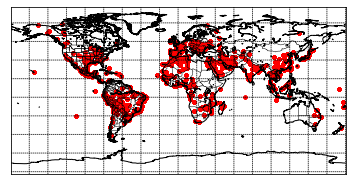

In [15]:
lati = []
lngt = []
for stat in df.index:
    lati.append(float(df['Latitude'][stat]))
    lngt.append(float(df['Length'][stat]))
m = Basemap(resolution='l', lat_0=0, lon_0=0)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawparallels(np.arange(-87.159, 87.159, 20))
m.drawmeridians(np.arange(0, 357.5, 20))
m.fillcontinents(color='white')
m.scatter(lngt, lati, marker='.', color='r', zorder=1.5)
plt.show()


In [17]:
meses=['09']
años=['2020']
horas=['00','06','12','18']
dias=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
for año in años:
    for mes in meses:
        for dia in dias:
            for hora in horas:
                filename=f'{año}-{mes}-{dia} {hora}:00:00.csv'
                df_file=df.loc[df['Date']==f'{dia}-{mes}-{año} {hora}:00:00']
                df_file.to_csv(filename, index=False)

In [18]:
X_speedy_lon = np.linspace(0,360-3.75,96)
Y_speedy_lat = np.array("-87.159 -83.479 -79.777 -76.070 -72.362 -68.652 -64.942 -61.232 -57.521 -53.810 -50.099 -46.389 -42.678 -38.967 -35.256 -31.545 -27.833 -24.122 -20.411 -16.700 -12.989 -9.278 -5.567 -1.856 1.856 5.567 9.278 12.989 16.700 20.411 24.122 27.833 31.545 35.256 38.967 42.678 46.389 50.099 53.810 57.521 61.232 64.942 68.652 72.362 76.070 79.777 83.479 87.159".split(" "))
Y_speedy_lat = Y_speedy_lat.astype(np.float32)
X_noaa_lon = np.linspace(0,360-2.5,144)
Y_noaa_lat = np.linspace(90,-90,73)

In [19]:
def nearest_neighbour(X_lng, Y_lat, lng, lat):
    diff_x = 100
    diff_y = 100
    pos_x = 0
    pos_y = 0
    for x in X_lng:
        diff = abs(x - lng)
        if diff_x > diff:
            pos_x = x
            diff_x = diff

    for y in Y_lat:
        diff = abs(y - lat)
        if diff_y > diff:
            pos_y = y
            diff_y = diff
    return [pos_x, pos_y]


In [20]:
print(data2[0])
    

['2020-09-01 00:00:00', 50.13333333333333, -122.95, 658.0, 'Pressure', 1019.0]


In [21]:
dataNOAA=[]
dataSPEEDY=[]
for data in data2:
    [lngSpeddy,latSpeddy]=nearest_neighbour(X_speedy_lon, Y_speedy_lat, float(data[2])+180,float(data[1]))
    [lngNOAA,latNOAA]=nearest_neighbour(X_noaa_lon, Y_noaa_lat, float(data[2])+180,float(data[1]))
    dataNOAA.append([data[0],latNOAA,lngNOAA,data[3],data[4],data[5]])
    dataSPEEDY.append([data[0],latSpeddy,lngSpeddy,data[3],data[4],data[5]])


In [22]:
df_NOAA = pd.DataFrame(dataNOAA,columns=['Fecha','Latitud','Longitud','Altitud','Variable','Valor'])
df_NOAA.head(10)
df_NOAA.to_csv(f'AllData_NOAA_coord.csv', index=False)

In [23]:
df_SPEEDY = pd.DataFrame(dataSPEEDY,columns=['Fecha','Latitud','Longitud','Altitud','Variable','Valor'])
df_SPEEDY.head(10)
df_SPEEDY.to_csv(f'AllData_SPEEDY_coord.csv', index=False)

In [24]:
def plot_speedy():
    plt.figure()
    for x in X_speedy_lon:
        for y in Y_speedy_lat:
            plt.plot(x,y,'ko',ms=1);

def plot_noaa():
    plt.figure()
    for x in X_noaa_lon:
        for y in Y_noaa_lat:
            plt.plot(x,y,'ko',ms=1);

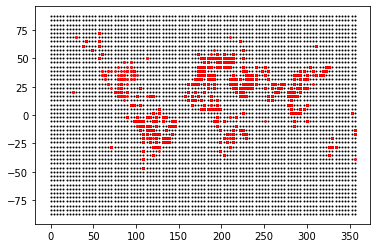

In [25]:
plot_speedy()
for reg in df_SPEEDY.index:
    plt.plot(df_SPEEDY['Longitud'][reg],df_SPEEDY['Latitud'][reg],'ro',ms=1);

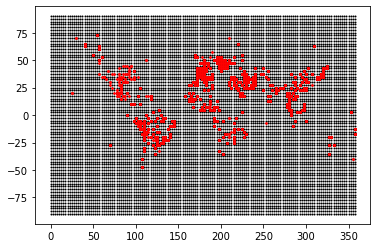

In [26]:
plot_noaa()
for reg in df_NOAA.index:
    plt.plot(df_NOAA['Longitud'][reg],df_NOAA['Latitud'][reg],'ro',ms=1);